Import Library

In [1]:
from google.colab import drive
import keras,os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

Load Data

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd gdrive/MyDrive/Datasets/jeruk/

/content/gdrive/MyDrive/Datasets/jeruk


In [4]:
%ls

jeruk.vgg16/  jeruk.zip  test/  train/  vgg16_jeruk/


Preprocessing

In [5]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="train", target_size=(224, 224), batch_size=32)

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


Membangun model vgg16

In [6]:
model = tf.keras.Sequential([
    
    layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu", name="conv1"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", name="conv2"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2), name ="pool1"),

    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name="conv3"),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name="conv4"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool2"),

    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv5"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv6"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv7"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool3"),

    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv8"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv9"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv10"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool4"),

    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv11"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv12"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv13"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool5"),

    layers.Flatten(name="flatten"),

    layers.Dense(units=4096, activation="relu", name="fc1"),
    layers.Dense(units=4096, activation="relu", name="fc2"),
    layers.Dense(units=2, activation="softmax", name="output",)
])

In [7]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 224, 224, 64)      1792      
                                                                 
 conv2 (Conv2D)              (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv3 (Conv2D)              (None, 112, 112, 128)     73856     
                                                                 
 conv4 (Conv2D)              (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0         
                                                                 
 conv5 (Conv2D)              (None, 56, 56, 256)       2

Melatih dan menyimpan hasil train terbaik

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_jeruk.h5",monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=False, save_freq='epoch') # simpan setiap epoch
early = EarlyStopping(monitor='val_accuracy',min_delta=0, patience=10,verbose=1)

In [10]:
history = model.fit(traindata, steps_per_epoch=10, validation_data=testdata, validation_steps=10, epochs=50, callbacks=[checkpoint, early])

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 873.1725 - accuracy: 0.5312
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to vgg16_jeruk.h5
10/10 [==============================] - 122s 10s/step - loss: 873.1725 - accuracy: 0.5312 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.7132 - accuracy: 0.5469
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 66s 7s/step - loss: 0.7132 - accuracy: 0.5469 - val_loss: 1.2239 - val_accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.7135 - accuracy: 0.4969
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 47s 5s/step - loss: 0.7135 - accuracy: 0.4969 - val_loss: 0.7173 - val_accuracy: 0.4933
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.6706 - accuracy: 0.6094
Epoch 4: val_accuracy improved from 0.50000 t

Evaluasi Model

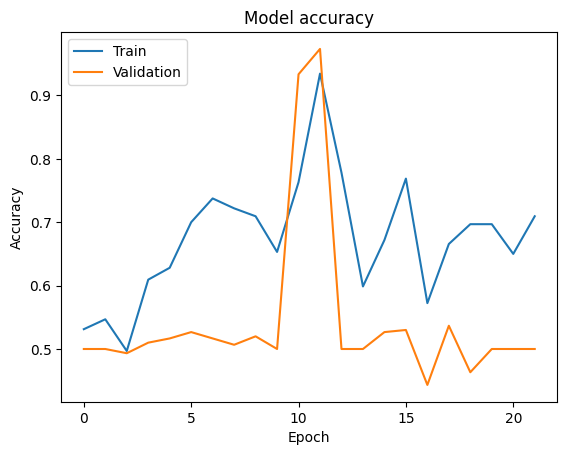

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()